# Using finite differences to solve differential equations

## Stationary equations - without time

### Setup
We are given $u_{xx} + u_{yy} = f(x, y)$ and boundary $\Omega$ such that $u(\Omega)$ are provided.

Inputs are:
- $N_{x}$
- $N_{y}$

### Problem
approximate u(x, y)...

### Solution
- Select the operator to approximate $\nabla^{2}$, e.g. $\Lambda u_{i} = \frac{u_{i+1} - 2u_{i} + u_{i-1}}{h^{2}}$
- Given $N_{x}$ and $N_{y}$ and the boundary, e.g. $[0, 1]$ for both x and y, we basically have a 2D network
- For every point of the network (i, j) (not on the boundary) we write down
    
    $\Lambda_{i}u_{ij} + \Lambda_{j}u_{ij} = f(x_{i}, y_{j})$
    
- For every point on the boundary, equation is basically taking the form of a boundary condition

    $u(\Omega)$ = some values
    
- We basically gonna get this: $\textbf{A} u = b$, where matrix $\textbf{A}$ has dimensions of $N_{p} \times N_{p}$, where $N_{p}$ is the number of points in the network and $N_{p} = N_{x} \times N_{y}$
- Solve $\textbf{A} u = b$


## Nonstationary equations - with time

### Setup
We are given 
- $u_{xx} + u_{yy} = f(x, y)$ - Poisson equation on rectangular boundary: x $\epsilon$ [a, b], y $\epsilon$ [c, d]
- u is known on the boundary - Dirichlet boundary conditions
- Apply the "determination" (may be this guy has a different name) method:

    $u_{t} = u_{xx} + u_{yy} - f(x, y)$ with the following operator's approximation (just as an example)
    
    $\frac{u^{n+1}_{i} - u^{n}_{i}}{\tau} = \Lambda u^{n}_{i} - f_{i}$ with $\Lambda$ defined as above

Inputs are:
- f(x, y)
- u on the boundary
- at t=0 $u^{0}(x, y) = C$, we need to select const C
- $\tau$ - step in time
- $N_{x}$ - number of steps in x => we do know $h_{1}$
- $N_{y}$ - number of steps in y => we do know $h_{2}$
- $\epsilon$

### Problem
Approximate so that

$max_{ij}$ $\frac{|u^{n+1}_{ij} - u^{n}_{ij}|}{\tau} < \epsilon$

### Solution
we basically need to keep solving $\textbf{A}u = b$ until we converge on all points of the network...

```python
# at time t = 0
# u is known and equals C everywhere...
u_array = ...

# for each t >= 1
while (!condSatisfied):
    A = compute_A(u_array, ...)
    b = compute_b(...)
    u_new_array = ... # solve (Au = b)
    max_diff = max(abs(u_new_array - u_array))
    condSatsfied = max_diff/tau < eps
```

In [13]:
import matplotlib.pyplot as plt
import numpy as np

## Let's solve the original problem but for a simple 1d case and using a simple approximation defined just above
- $u_{xx} = f(x)$
- $u(x) = cos(x) sin(x)$
- $f(x) = -2sin(2x)$
- for x $\epsilon$ [0, 2$\pi$]

### 1. Plot the result

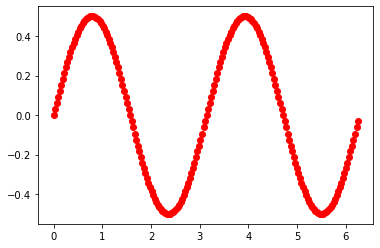

In [14]:
t1 = np.arange(0, 2*np.pi, 0.01*np.pi, np.float32)
plt.plot(t1, np.sin(t1)*np.cos(t1), 'ro')
plt.show()

### 2. At time t=0, we have

### Notes for selecting initial conditions below
- Observed that although solution seems to converge, it is possible to decrease the $\epsilon$ value so that it starts going nuts (crazy values... for u)
- Number of data points affects the $h^{2}$ parameter which if sufficiently small, can dominate in the equation below

    $u^{n+1}_{i} = u^{n}_{i} + \tau \frac{u^{n}_{i+1} - 2u^{n}_{i} + u^{n}_{i-1}}{h^{2}} - f_{i}\tau$

In [34]:
# helper to fill in the f-values
def give_me_func(Nx, delta):
    def func(i):
        x = i*delta
        print(i)
        print(x)
        return -2*np.sin(2*x)
    return func

Nx = 100
eps = 0.001
tau = 0.001
x_start = 0
x_end = 2*np.pi
x_delta = (x_end - x_start) / (Nx - 1)
C = 0
u_values = np.zeros((Nx))
u_values.fill(C)
u_gold_func = lambda x: np.cos(x) * np.sin(x)
f_values = np.fromfunction(give_me_func(Nx, x_delta), (Nx,), dtype=float)
print(x_delta*x_delta, 1 / (x_delta * x_delta))

[ 0.  1.  2.  3.  4.  5.  6.  7.  8.  9. 10. 11. 12. 13. 14. 15. 16. 17.
 18. 19. 20. 21. 22. 23. 24. 25. 26. 27. 28. 29. 30. 31. 32. 33. 34. 35.
 36. 37. 38. 39. 40. 41. 42. 43. 44. 45. 46. 47. 48. 49. 50. 51. 52. 53.
 54. 55. 56. 57. 58. 59. 60. 61. 62. 63. 64. 65. 66. 67. 68. 69. 70. 71.
 72. 73. 74. 75. 76. 77. 78. 79. 80. 81. 82. 83. 84. 85. 86. 87. 88. 89.
 90. 91. 92. 93. 94. 95. 96. 97. 98. 99.]
[0.         0.06346652 0.12693304 0.19039955 0.25386607 0.31733259
 0.38079911 0.44426563 0.50773215 0.57119866 0.63466518 0.6981317
 0.76159822 0.82506474 0.88853126 0.95199777 1.01546429 1.07893081
 1.14239733 1.20586385 1.26933037 1.33279688 1.3962634  1.45972992
 1.52319644 1.58666296 1.65012947 1.71359599 1.77706251 1.84052903
 1.90399555 1.96746207 2.03092858 2.0943951  2.15786162 2.22132814
 2.28479466 2.34826118 2.41172769 2.47519421 2.53866073 2.60212725
 2.66559377 2.72906028 2.7925268  2.85599332 2.91945984 2.98292636
 3.04639288 3.10985939 3.17332591 3.23679243 3.30025895 3.

### 3. Define computations we need to perform
- computing matrix A
- computing vector b
- solver for $\textbf{A}u = b$

In [35]:
# TODO: this is a simple case - identity matrix for A...
def compute_matrix_A(u_values, f_values, tau, x_delta, Nx):
    def func(i, j):
        return 1
    
    return func

def compute_vector_b(u_values, u_gold_func, f_values, tau, x_start, x_delta, Nx):
    b = np.zeros((Nx))
    indices = np.arange(0, Nx, 1, np.int32)
    
    # on the boundary, return the boundary condition value
    b[0] = u_gold_func(x_start)
    b[Nx-1] = u_gold_func(x_start + x_delta*(Nx-1))
    
    # otherwise compute the value
    x_delta_2 = x_delta*x_delta
    i_slice = indices[1:Nx-1]
    b[i_slice] = u_values[i_slice] + (tau/x_delta_2 *
        (u_values[i_slice+1] - 2*u_values[i_slice] + u_values[i_slice-1]) - f_values[i_slice]*tau)
    return b

def compute_max_eps(u_new, u, tau):
    return np.amax(np.abs(u_new - u))/tau

In [46]:
# main minimization loop. 
condSatisfied = False
iterations = 0
max_iterations = 100
verbose = False
while not condSatisfied and iterations < max_iterations:
    b = compute_vector_b(u_values, u_gold_func, f_values, tau, x_start, x_delta, Nx)
    u_values_new = b # simple here
    max_eps = compute_max_eps(u_values_new, u_values, tau)
    if max_eps < eps: 
        condSatisfied = True
    if verbose:
        print(u_values)
        print(u_values_new)
        print(u_values_new - u_values)
    u_values = u_values_new
    iterations += 1
print(iterations, max_eps, eps)

100 0.03667690033903881 0.001


### Plot the result

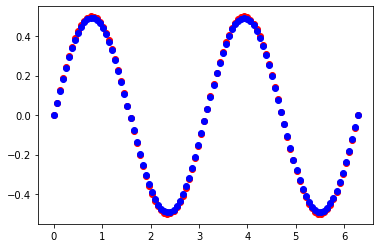

In [47]:
t1 = np.arange(0, 2*np.pi+0.5*x_delta, x_delta, np.float32)
plt.plot(t1, np.sin(t1)*np.cos(t1), 'ro', t1, u_values, 'bo')
plt.show()